### Task

You are employed by a large supermarket chain to perform customer segmentation analysis. In particular, you are provided with a dataset on 2000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc. 

Your task is to analyse the data in Python using relevant techniques covered in lectures, and identify customer segments given the dataset.

## Reading and Understanding the Data

In [ ]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data = pd.DataFrame(pd.read_csv("../input/dataja5465493csv/data-JA-54654-9-3.csv"))

In [5]:
# Check the head of the dataset
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


## Data overview

In [6]:
#Check the shape of dataset
data.shape

(2000, 8)

In [7]:
data.Education.unique()

array([2, 1, 0, 3])

In [8]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [9]:
# Describe Dataset
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Data Cleaning

In [10]:
# Checking Null values
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [11]:
# Checking for duplicate
data.duplicated().sum()

0

In [12]:
#dropping columns that will not make sence for prediction 
data.drop(labels=['ID'],axis=1,inplace=True) 

Observations:

1. Data size is (2000,8)

2. None of the columns has Null values

3. There is not any duplicated value in  dataset

4. Age and Income columns has continous numerical values

5. Sex, Marital status, Education, Occupation and Settlement size columns has discrete numerical values

## Exploratory Data Analytics


***1. Dist plot for age and income***

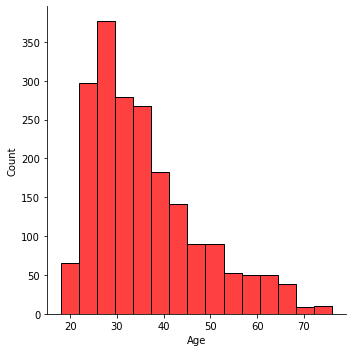

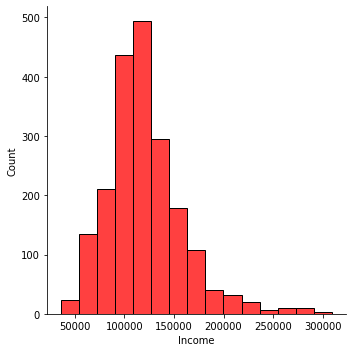

In [16]:
ncol=['Age','Income']
for column in ncol:
    
    sns.displot(data[column],bins=15,color="red") # Stack these distributions together with different colors 
    plt.show()


Observations:

1. Age: In Age distplot most of the data falls to the right of the graph's peak is known as a right-skewed graph. A right-skewed histogram has a definite relationship between its mean, median, and mode which can be written as mean > median > mode.Here we can see that most of the customers are of age 25 to 27 .
2. Income: Looks to be normally distributed. Maximum customer income is between 1,00,000 to 1,25,000.



***2. Observations on gender***

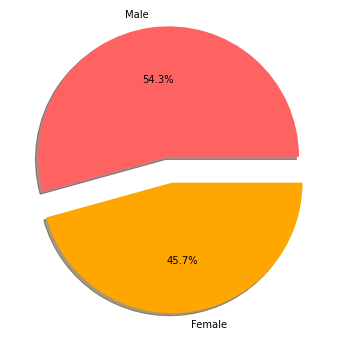

In [17]:
plt.figure(figsize=(8,6))
labels=['Male', 'Female']
explode=[.1,.1]
mycolors = ["#FF6361", "#FFA600"]
sizes=data.Sex.value_counts().values
plt.pie(sizes,explode,labels,autopct="%1.1f%%",shadow = True,colors = mycolors)
plt.show()

Here 54.3% are males and 45.7% are females.

***3. Distribution of Marriage Status***

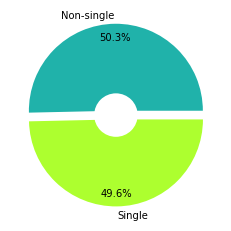

In [18]:
sizes=data['Marital status'].value_counts().values
labels=['Non-single','Single']
explode1=[.05,.05]
colors = ['#20B2AA', '#ADFF2F']
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode1)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.25, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In this chart, we can see that 49% of the people here are single and 51% of the people are those who are not single or those who are divorced / separated / married / widowed.

***4. Observations on Age***

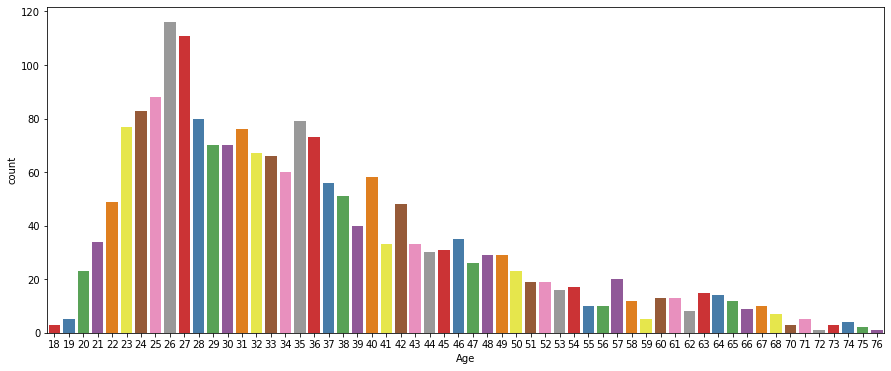

In [19]:
# use a count plot
plt.figure(figsize=(15, 6))
sns.countplot(x ='Age', data = data, palette = "Set1")
 
# Show the plot
plt.show()

From this count plot, we can see that approximately 115 customers are aged 26 and around 115 customers are aged 26, so we can say the maximum number of customers in the dataset is young.

***5. Insights on Education***

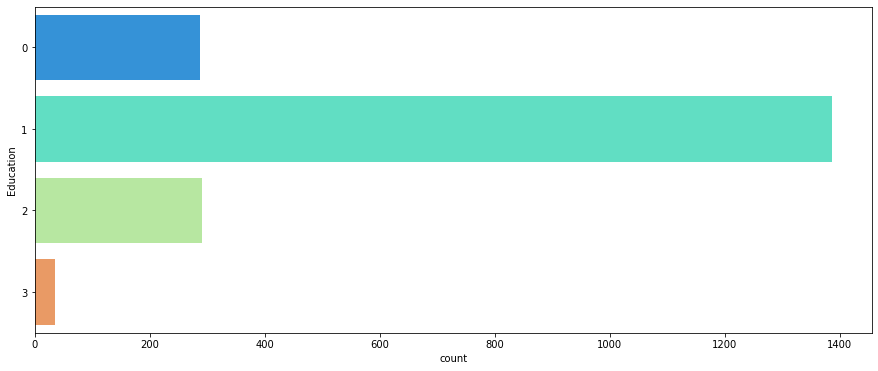

In [20]:
# use a count plot
plt.figure(figsize=(15, 6))
sns.countplot(y ='Education', data = data, palette = "rainbow")
 # Show the plot
plt.show()

Here we can see that the maximum number of customers are those who have completed their high school and after that those customers who have completed university, least number of customers are those who have completed their graduation.

***Review on  Occupation***

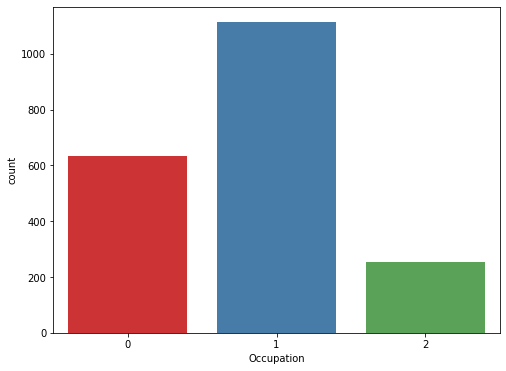

In [21]:
# use a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x ='Occupation', data = data, palette = "Set1")
 
# Show the plot
plt.show()

Maximum customers work as skilled employee / official workers followed by those customers who are unemployed / unskilled and lowest customers who are management / self-employed / highly qualified employee / officer .

***Opinions on Settlement size***

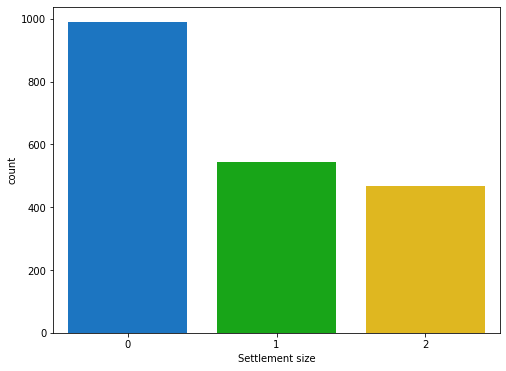

In [22]:
# use a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x ='Settlement size', data = data, palette = "nipy_spectral")
 
# Show the plot
plt.show()

The maximum number of customers live in a small city, followed by those who live in a made-size city, and the least number of customers who live in a big city. 

***Connections between Occupation and Gender***

Text(0.5, 0.98, 'Sex vs Occupation')

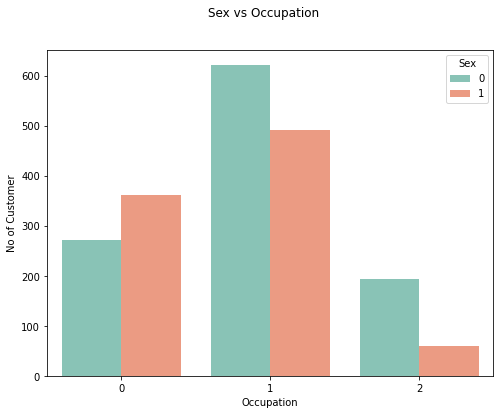

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Occupation", hue="Sex", data=data,palette= ["#7fcdbb","#fc9272"],ax=ax)
ax.set_xlabel("Occupation")
ax.set_ylabel("No of Customer")

fig.suptitle("Sex vs Occupation")

Most of the customers who are skilled employees are men and less are women. Customers who are unemployed are mostly women and those customers who are self employed are mostly men

### Outlier Detection

<AxesSubplot:xlabel='Age'>

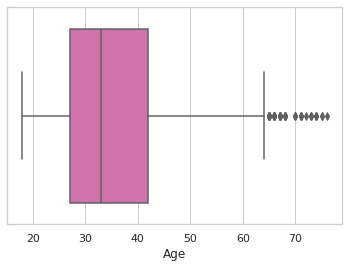

In [24]:
# Checking outliers in age column

# use to set style of background of plot
sns.set(style="whitegrid")
sns.boxplot(x =data['Age'],palette='PuRd')

<AxesSubplot:xlabel='Income'>

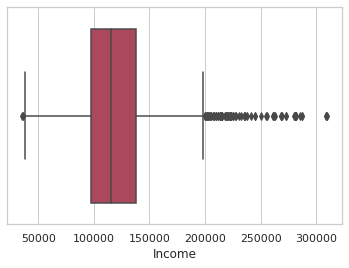

In [25]:
# Checking outliers in Income column

# use to set style of background of plot
sns.set(style="whitegrid")
sns.boxplot(x =data['Income'],palette='inferno')

**Outlier Treatment :**

Age and Income have considerable outliers.

We can drop the outliers as we have sufficient data.

In [26]:
# outlier treatment for Age
Q1 = data.Age.quantile(0.25)
Q3 = data.Age.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Age >= Q1 - 1.5*IQR) & (data.Age <= Q3 + 1.5*IQR)]

In [27]:
# outlier treatment for Income
Q1 = data.Income.quantile(0.25)
Q3 = data.Income.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Income >= Q1 - 1.5*IQR) & (data.Income <= Q3 + 1.5*IQR)]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


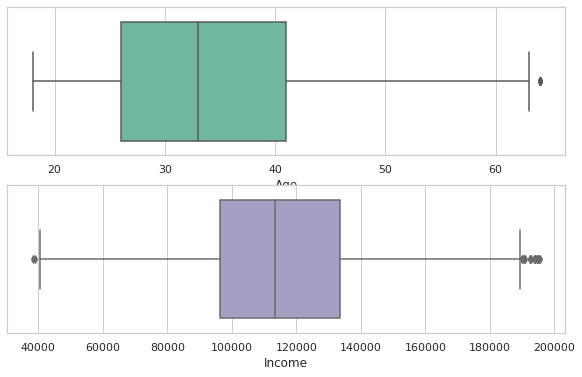

In [29]:
# Count column plots to map the dependence of 'Target' column on categorical features

plt.figure(figsize = (10,6))
plt.subplot(211)
plt1 = sns.boxplot(data['Age'], palette='BuGn')
plt.subplot(212)
plt2 = sns.boxplot(data['Income'], palette='Purples_r')
plt.show()

Here we removed lot of outliers, It's look good.

### Feature Selection Technique

### Pearson correlation for continous numerical variable

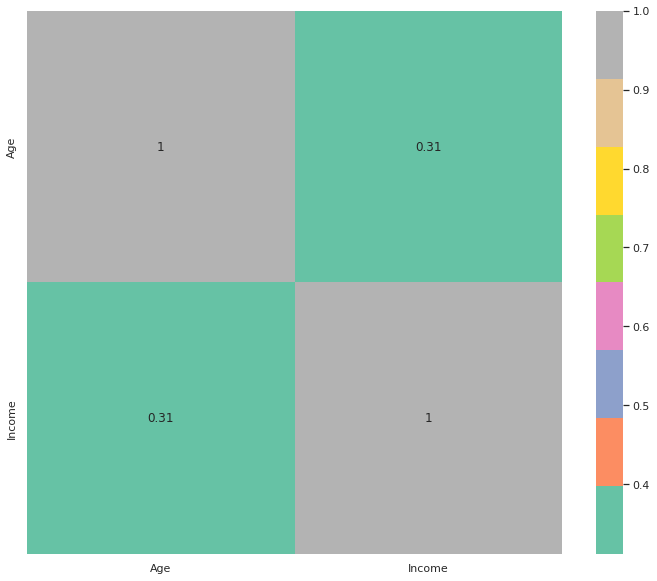

In [31]:
#Displaying Correlation between varaibles using heatmap
plt.figure(figsize=(12,10))
df1=data[['Age','Income']]
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Set2)
plt.show()

Observations:
1. There is not avialible highely correlated variables.
2. Features selected on the basis of Pearson Correlation, and the features having correlation value are dropped from the dataset as the have same effect.


In [32]:
# Make  copy of  data set
df=data.copy()

### Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1.066443,0.991471,-1.230102,0.013739,1.186570,0.385436,1.620266
1,-0.937697,-1.008602,1.376024,0.013739,-0.891570,-1.258387,-0.872862
2,-0.937697,-1.008602,0.989931,0.013739,1.888432,0.385436,0.373702
3,-0.937697,-1.008602,1.762116,0.013739,1.127767,0.385436,0.373702
4,-0.937697,-1.008602,0.024699,0.013739,0.986564,-1.258387,-0.872862


### Principal Component Analysis

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,0.673861,0.878142
1,-0.588177,-0.780305
2,2.177233,-0.262655
3,1.993462,-0.185776
4,0.020751,-0.812141
...,...,...
1863,-0.722407,0.256946
1864,-0.977552,0.820537
1865,-1.268046,-2.480272
1866,-2.221810,0.500076


In [35]:
# Make two copy of  data set
df_scaled1=df_scaled.copy()
df_scaled2=df_scaled.copy()

# ***Model Building***


### 1. K-Means Clustering

#### Finding the Optimal Number of Clusters

 

**A. Elbow Curve to get the right number of Clusters**



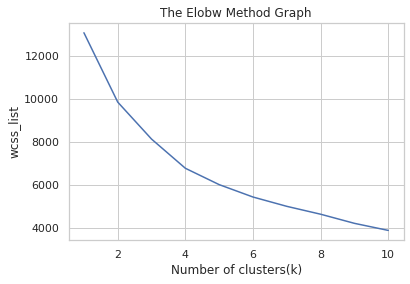

In [36]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 21)  
    kmeans.fit(df_scaled1)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

The appropriate value of k from elbow curve seems to be 3 , 4 or 5
From the above plot.

**Silhouette Analysis**


The value of the silhouette score range lies between -1 to 1.

    A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

    A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [39]:
from sklearn.metrics import silhouette_score
sil_score = []
cluster_list = list(range(3,6))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++')
    preds = clusterer.fit_predict((df_scaled1))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(df_scaled1, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 3, silhouette score is 0.24415006386767313)
For n_clusters = 4, silhouette score is 0.2700489585300145)
For n_clusters = 5, silhouette score is 0.2529861505163137)


we can see the silhouette score is high on 4. So the number of clusters here will be 4.

#### Build the model with 4 centroids
Fit the K-means algorithms on the  data with number of cluster equal to 4


In [41]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(df_scaled1)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

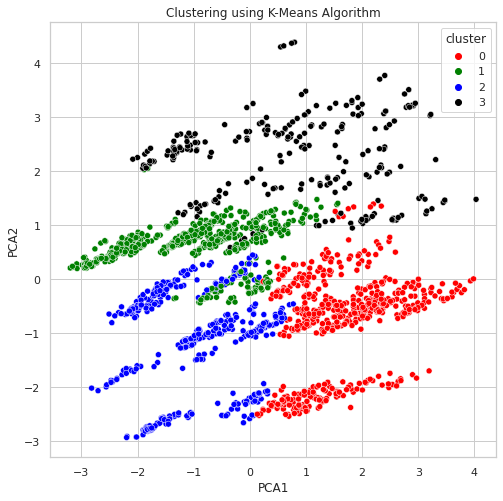

In [42]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [43]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=21)
kmeans.fit(df_scaled1)

KMeans(n_clusters=4, random_state=21)

In [44]:
# adding kmeans cluster labels to the scaled dataframes
df_scaled1['cluster'] = kmeans.labels_

<Figure size 2160x2160 with 0 Axes>

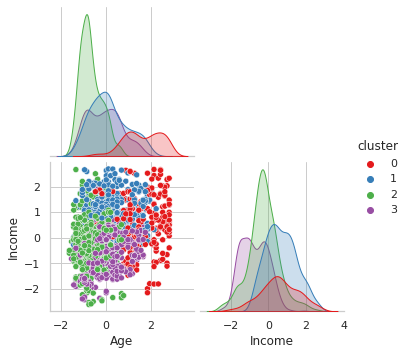

In [45]:
#Visualize the Clusters with Features
plt.figure(figsize=(30, 30))
df_scaled11=df_scaled1[['Age','Income','cluster']]
sns.pairplot(df_scaled11, diag_kind='kde', corner=True, hue='cluster', palette='Set1');

In [46]:
df_scaled1.groupby(by = 'cluster').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster,,,,,,,
0,0.314890,0.516454,1.633419,1.953796,0.571375,-0.004972,0.114001
1,-0.890154,-0.658224,0.126683,-0.434507,0.670936,0.751397,0.940115
2,0.856634,0.941469,-0.675395,0.022331,-0.267615,-0.087163,-0.290483
3,-0.309126,-0.831323,-0.066340,-0.557030,-0.758021,-0.806336,-0.810533


<AxesSubplot:xlabel='cluster'>

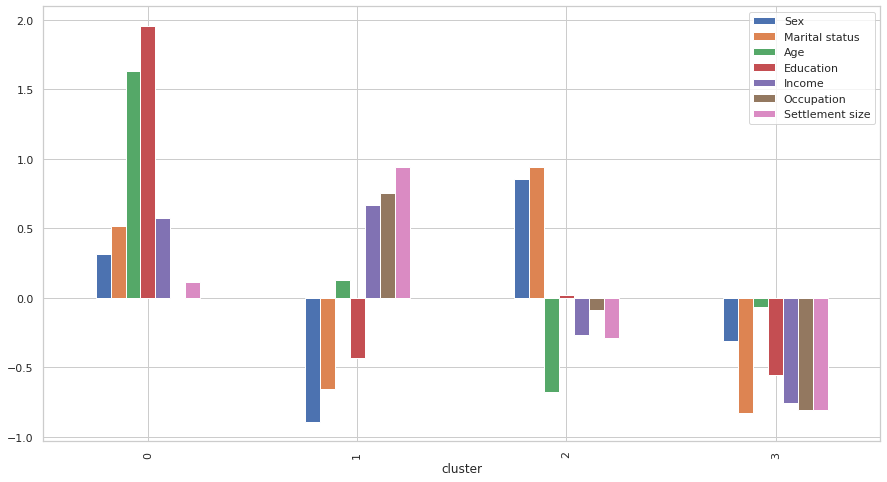

In [47]:
df_scaled1.groupby('cluster').mean().plot.bar(figsize=(15,8))

In [48]:
df['cluster']=df_scaled1['cluster']

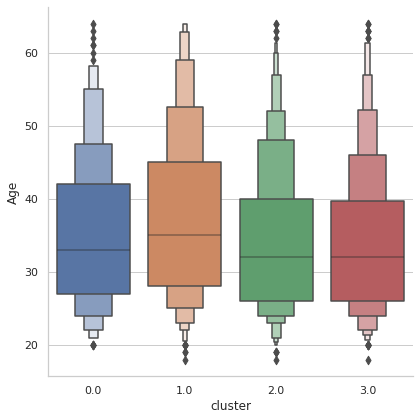

In [49]:
# Cat plot to visualize Cluster vs Age

sns.catplot(y="Age", x="cluster", data=df, kind="boxen", height=6);

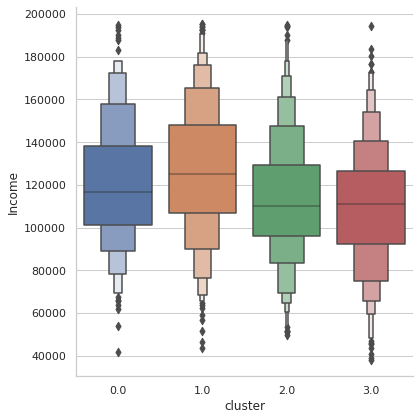

In [50]:
# Box plot to visualize Cluster vs Income

sns.catplot(y="Income", x="cluster", data=df, kind="boxen", height=6);

### Insights

***Cluster 0:***

1. There are more women than males in the cluster.
2. People who aren't single are the majority.
3. People whose age mean is equal to about 33.
4. People with an annual salary of around Rs. 108000.
5. The majority of the population lives in a medium-sized city.

***Cluster 1:***

1. Men outnumber women in the population.
2. The majority of them are single persons.
3. People who are around 28 to 44 years old.
4. The majority of them are wealthy individuals.
5. In the Big City, people live.

***Cluster 2:***

1. Women outnumber males by a large margin.
2. There are a lot of people out there who are not single.
3. People who are around 26 to 40 years old.
4. People with an annual salary of around Rs. 110000.
5. People who live in small cities and medium cities.

***Cluster 3:***

1. Men outnumber women by a large margin.
2. There are a lot of people out there who are single.
3. People who are around 26 to 39 years old.
4. There are maximum people in this whose income is very less.
5. Most of these people live in small cities.


### Insights

***Cluster 0:***

1. There are more men than women .
2. Most of them are people who are single.
3. People aged about 26 to 40 years.
4. People whose income mean is equal to about one lakh ten thousent.
5. Most of the people in this live in small city.

***Cluster 1:***

1. Men outnumber womens by a large margin.
2. It's mostly people who are single.
3. people whose age is about 29 to 44 years.
4. Most of them are people whose income is high.
5. Most of the people in this live in mediam city.

***Cluster 2:***

1. By a huge degree, women outweigh men.
2. There are many folks who are not single.
3. People between the ages of 24 and 41.
4. People with an average annual income of around Rs. 15,000,000.
5. People who reside in small and medium-sized towns.

***Cluster 3:***

1. There are more men than women .
2. There are almost equal numbers of single and not single.
3. people whose age is about 28 to 41 years.
4. People whose income is between 1 lakh to 140000
5. Most of these people live in small cities.
